## Description

This notebook visualizes multimodal concepts learnt by our decomposition approach for concept dictionary learnt for LLaVA-v1.5 for "Train" token on COCO

### Pre-requisites for further usage
1. The notebook builds on output of ```src/save_features.py``` and ```src/analyse_features.py```.
2. ```src/save_features.py``` saves representation of a model for a particular token of interest
3. ```src/analyse_features.py``` decomposes the the saved representations to learn the concept vectors and also extracts information about its multimodal grounding. All this information is saved in a file
4. To visualize for other target-tokens/models/representations/decomposition, information about usage of these files is in ```src/examples``` folder

### Import key packages

In [1]:
import torch
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib
print("Matplotlib version for info:", matplotlib.__version__)

Matplotlib version for info: 3.9.4


In [20]:
# Constants
result_path = "/mnt/abka03/xl-vlms/results"

### Loading file containing decomposition results and grounding info for token "train"

In [21]:
results_dict = torch.load(f'{result_path}/decompose_activations_text_grounding_image_grounding_qwen2_results_patch_cat_refrigerator_snmf.pth')
print(results_dict.keys())

concepts = results_dict['concepts']
activations = results_dict['activations']
text_grounding = results_dict['text_grounding']
image_paths = results_dict['image_grounding_paths']
print (f"Concepts shape: {concepts.shape}", f"Activations shape: {activations.shape}")
num_concepts = concepts.shape[0]


dict_keys(['concepts', 'activations', 'decomposition_method', 'text_grounding', 'image_grounding_paths', 'analysis_model'])
Concepts shape: torch.Size([50, 3584]) Activations shape: torch.Size([14, 50])


In [22]:
import pydicom
from PIL import Image
import numpy as np
import os

def load_image(file_path):
    """
    Load an image file (.dcm, .jpeg, .png).

    Parameters:
        file_path (str): The path to the image file.

    Returns:
        numpy.ndarray: The loaded image as a NumPy array.
    """
    # Extract the file extension
    ext = os.path.splitext(file_path)[-1].lower()

    if ext == ".dcm":
        # Load DICOM file
        dicom_data = pydicom.dcmread(file_path)
        image = dicom_data.pixel_array
        return image

    elif ext in [".jpeg", ".jpg", ".png"]:
        # Load JPEG or PNG file
        image = Image.open(file_path)
        return np.array(image)

    else:
        raise ValueError(f"Unsupported file format: {ext}")

### Function to generate multimodal grounding visualization of a given concept

In [23]:
def visualize_grounding(concept_idx, text_grounding, image_paths):
    words = text_grounding[concept_idx]
    paths = image_paths[concept_idx]
    num_imgs = len(paths)
    images = []
    for path in paths:
        cur_img = load_image(path)
        cur_img = np.array(Image.fromarray(cur_img).resize([256, 256]))
        images.append(cur_img)
    width = num_imgs*2+0.1
    fig = plt.figure(figsize=(width, width/5))
    for i in range(num_imgs):
        fig.add_subplot(1, num_imgs, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    fig.suptitle('Concept ' + str(concept_idx) + ': ' + str(words)) 

### Putting everything together to visualize all concepts for "train"

/tmp/ipykernel_130109/2717512848.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(width, width/5))


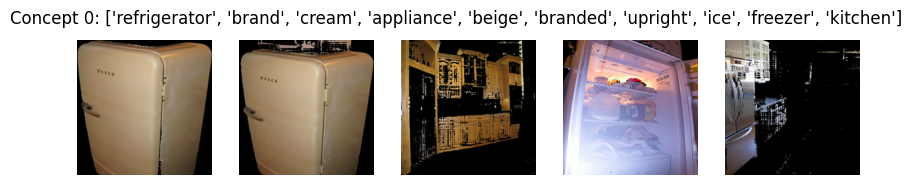

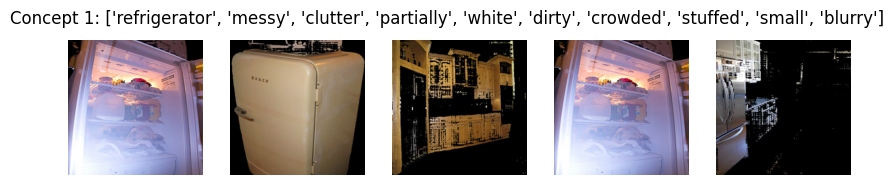

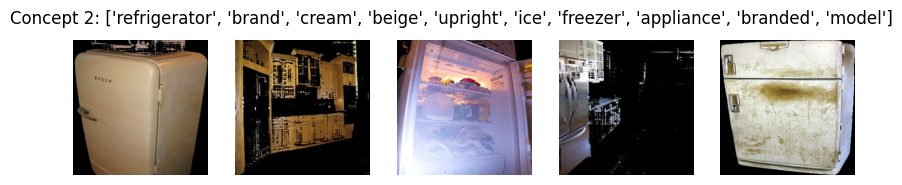

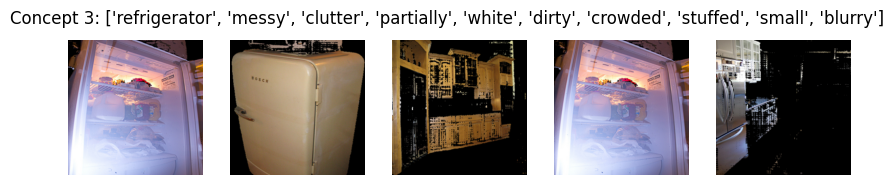

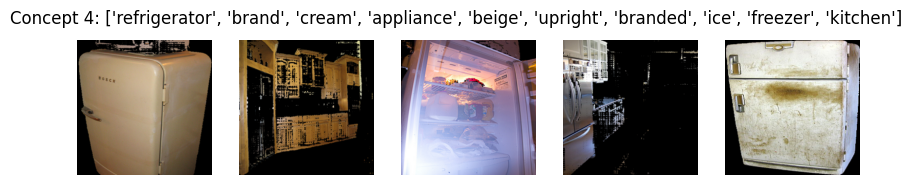

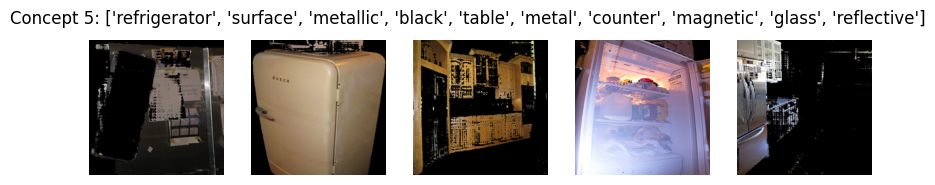

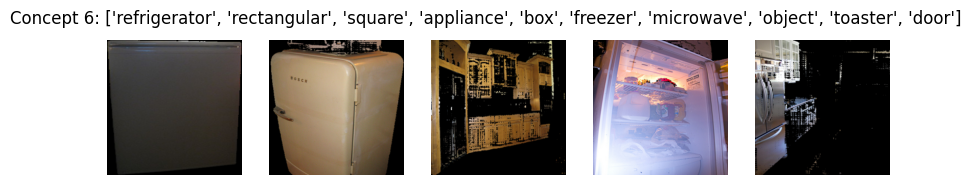

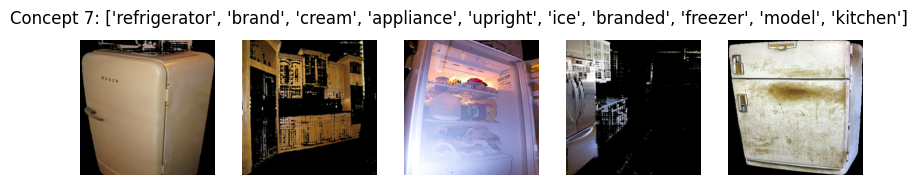

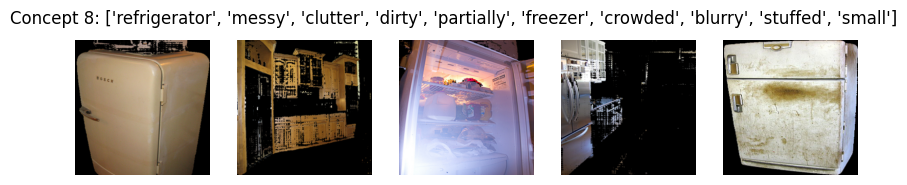

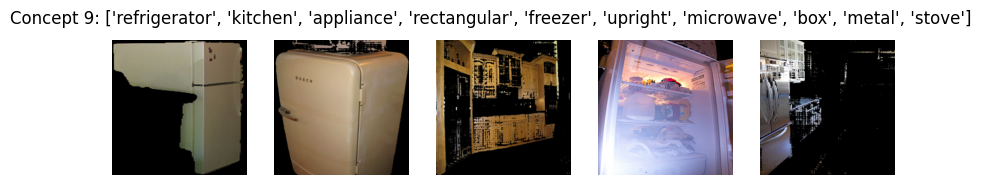

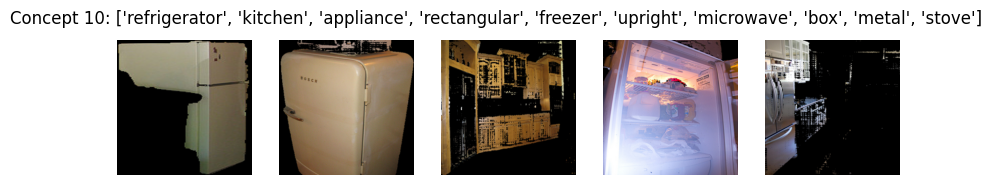

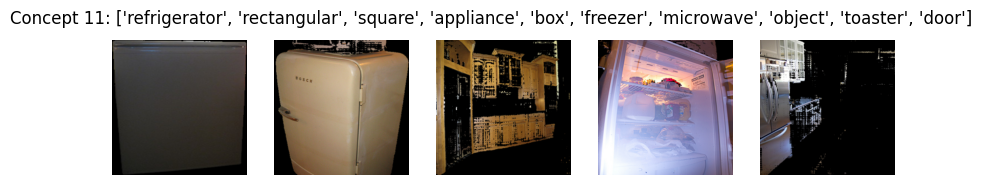

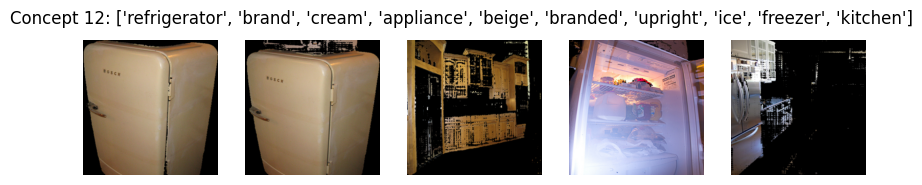

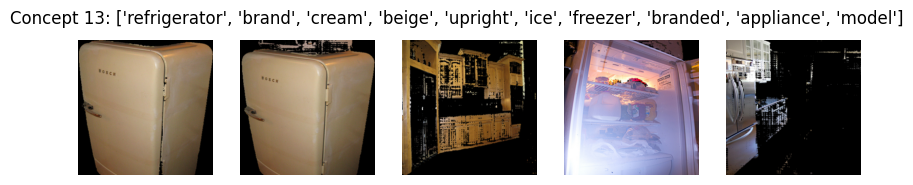

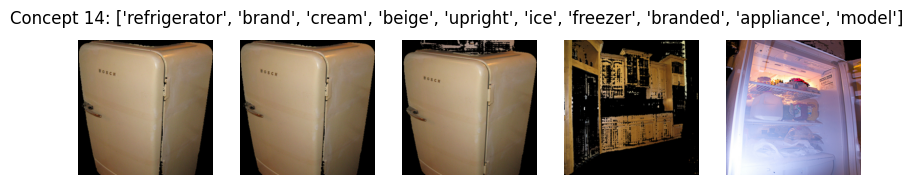

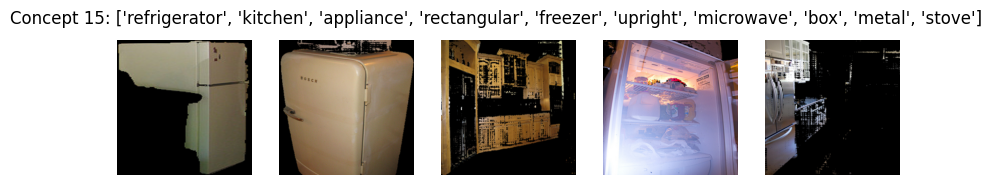

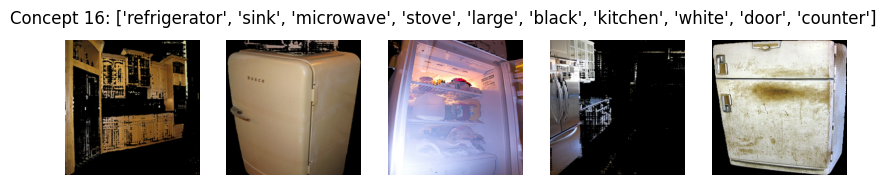

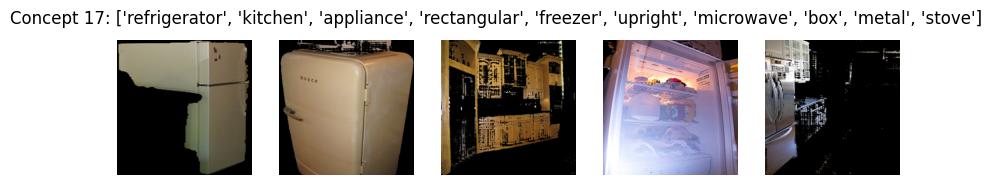

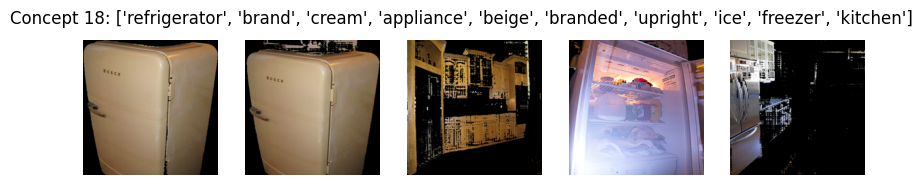

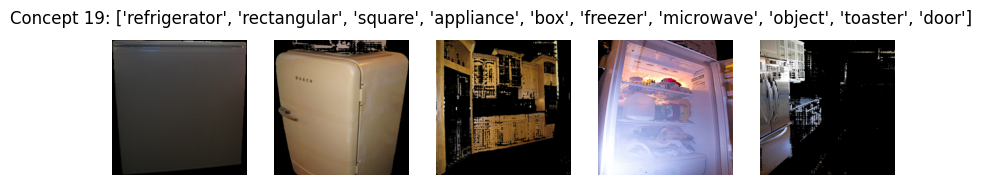

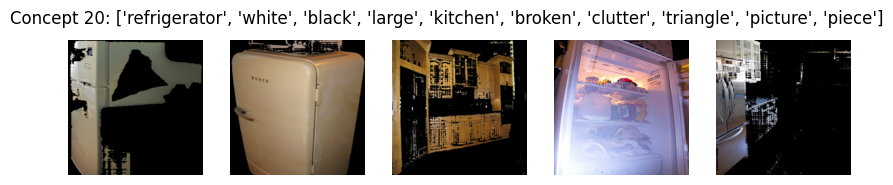

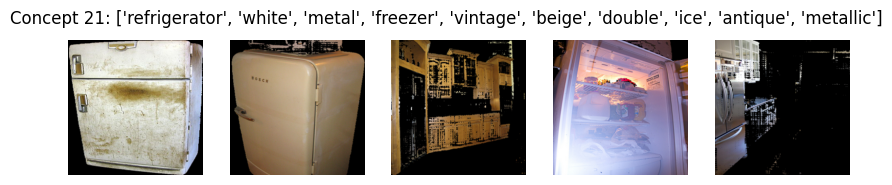

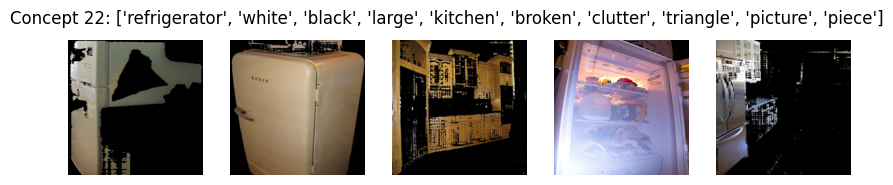

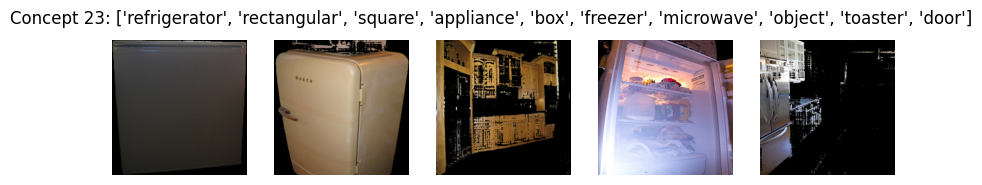

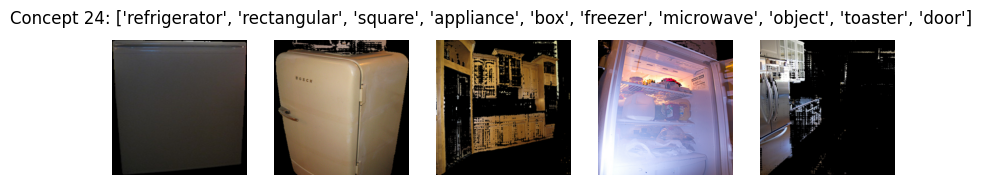

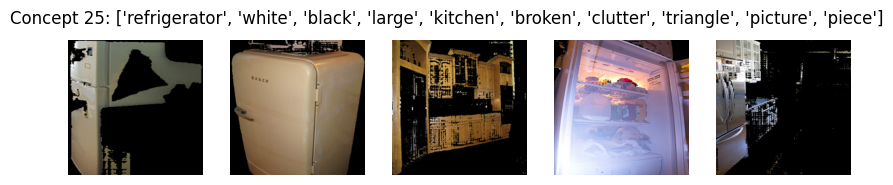

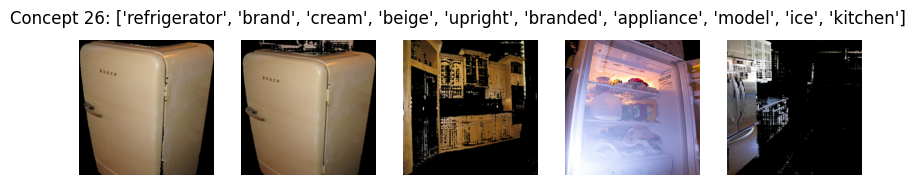

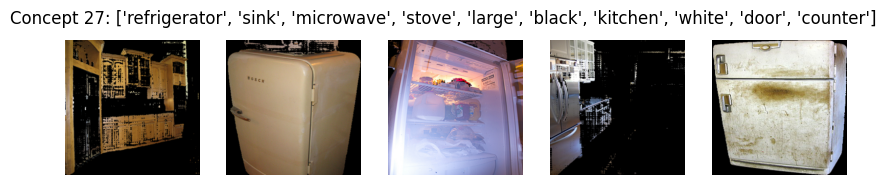

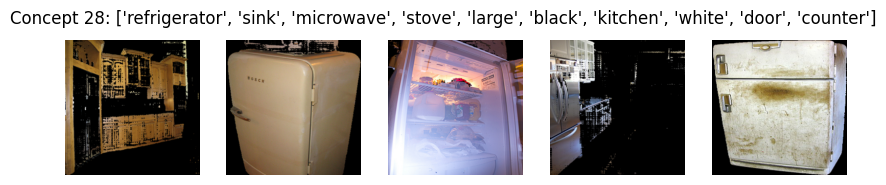

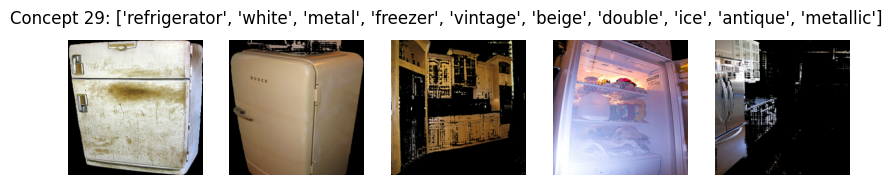

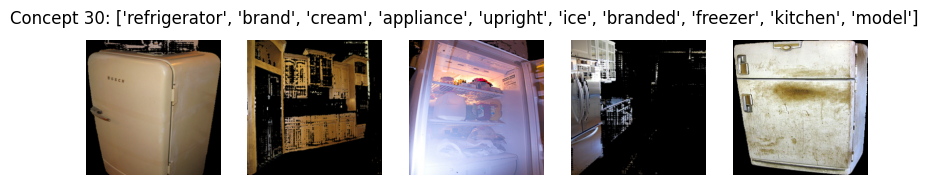

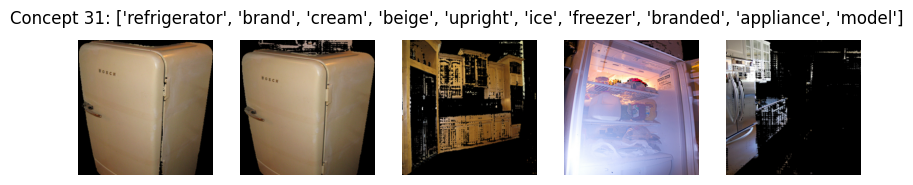

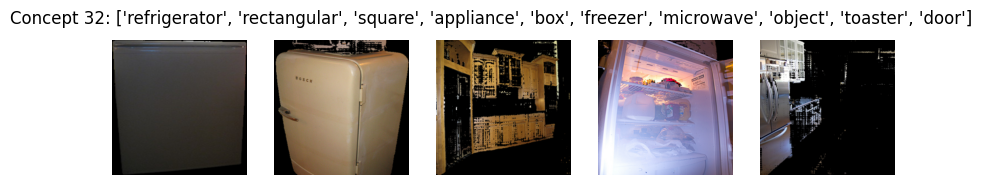

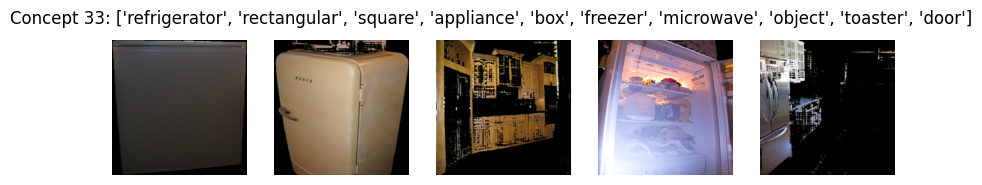

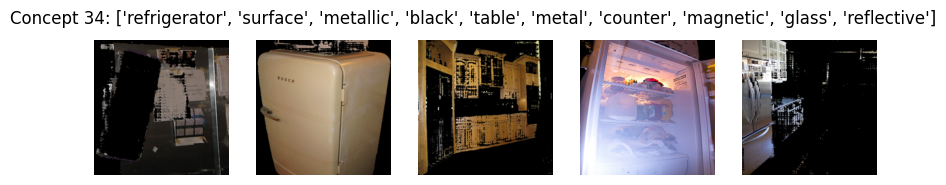

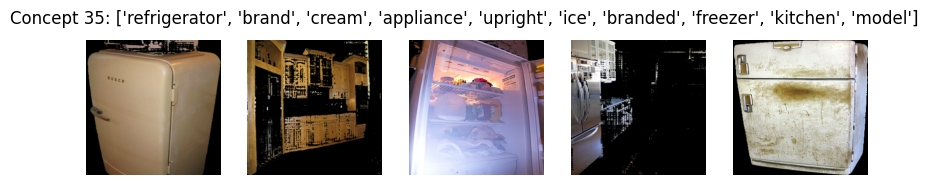

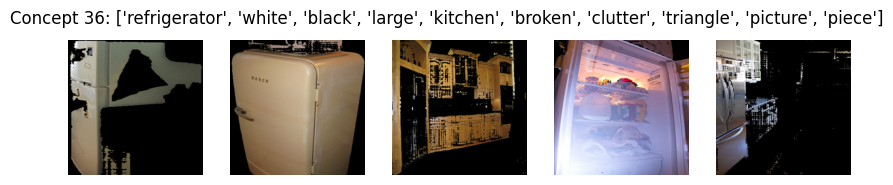

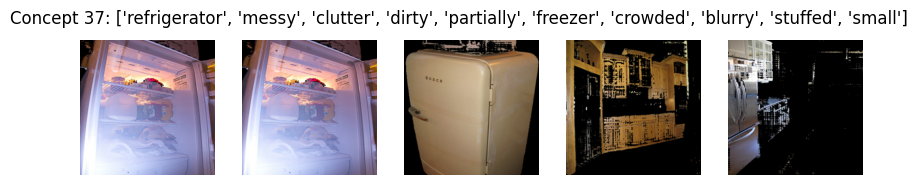

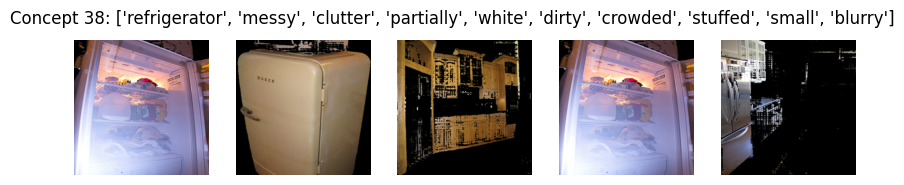

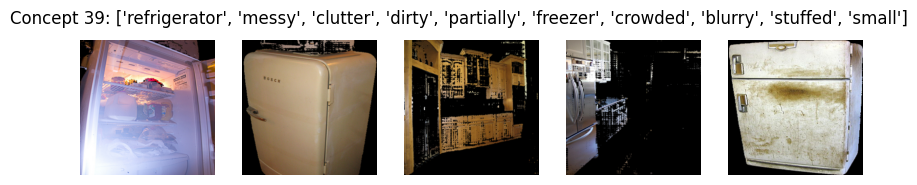

In [25]:

num_concepts = 40
for k in range(num_concepts):
    visualize_grounding(k, text_grounding, image_paths)